# Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Mordred 2D



## Reading Datasets

### I will start by importing the fda approved dataset with descriptors, and the pdb dataset with descriptors

In [2]:
PATH = "../../../../../../masters_data"

In [3]:
fda_approved = pd.read_csv(f"{PATH}/positive_datasets/fda_approved_mordred_2d.csv", low_memory=False)
print(fda_approved.shape)
fda_approved.head()

(1895, 1628)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


In [5]:
negative_df = pd.read_csv(f"{PATH}/negative_datasets/tox_mordred_2d.csv", low_memory=False)
print(negative_df.shape)
negative_df.head()

(7506, 1632)


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,...,9.698614,62.626045,258.013284,9.923588,442,22,84.0,97.0,6.256944444444445,3.444444
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,9.553433,61.306823,204.089878,7.558884,353,22,76.0,90.0,5.305555555555555,3.444444
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,10.503120,70.933915,288.245316,5.438591,812,44,124.0,158.0,6.430555555555555,4.465278
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,9.653808,52.828148,276.220164,5.754587,830,30,92.0,105.0,8.666666666666666,4.861111
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.682903,42.374286,205.974526,10.840765,136,18,56.0,64.0,8.1875,2.125000


### Sampling Negative Dataset

It is good to maintain a 1:1 proportion of positive and negative molecules in the final dataset. For this reason, random samples will be selected from the negative dataset, equaling the number of fda approved molecules.

In [6]:
np.random.seed(733518)

In [7]:
negative_sampled = negative_df.sample(fda_approved.shape[0], axis=0)
print(negative_sampled.shape)
negative_sampled.head()

(1895, 1632)


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
3223,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,NaN,...,10.915216,128.082962,1083.437855,7.738842,29219,113,366.0,412.0,28.916666666666664,16.777778
5142,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,...,9.077837,64.254017,266.188195,5.915293,1005,19,82.0,87.0,6.583333333333333,4.611111
1514,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,...,11.146215,85.654088,454.192230,7.209400,2185,76,192.0,252.0,12.590277777777777,6.277778
5969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,10.226187,66.499409,432.226037,6.860731,3236,49,154.0,179.0,10.25,7.277778
192,0.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,...,9.427466,47.906724,235.066700,8.105748,459,21,78.0,88.0,4.944444444444445,3.638889


### Now I'll separate the calculated descriptors and the other columns in the datasets

In [8]:
# saving only the calculated descriptors

flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
    "ROMol",
]

fda_approved_features = fda_approved.drop(labels=flag_columns, axis=1)

print(fda_approved_features.shape)
fda_approved_features.head()

(1895, 1613)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0,3,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0,1,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


In [9]:
# saving only the information variables (dropping ROMol)

flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
]

fda_approved_info = fda_approved[flag_columns]

print(fda_approved_info.shape)
fda_approved_info.head()

(1895, 14)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,parenteral,topical,oral
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,False,False,False,True
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,False,False,False,True
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,False,False,False,True
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,False,False,True,True
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,False,True,False,False


In [10]:
# saving only the calculated descriptors

flag_columns = [
    "NR-AR",
    "NR-AR-LBD",
    "NR-AhR",
    "NR-Aromatase",
    "NR-ER",
    "NR-ER-LBD",
    "NR-PPAR-gamma",
    "SR-ARE",
    "SR-ATAD5",
    "SR-HSE",
    "SR-MMP",
    "SR-p53",
    "mol_id",
    "smiles",
    "stripped_salt_smiles",
    "neutralized_smiles",
    "inchi",
    "duplicated",
    "ROMol"
]

negative_features = negative_sampled.drop(labels=flag_columns, axis=1)

print(negative_features.shape)
negative_features.head()

(1895, 1613)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
3223,56.718944,41.988950,0,4,92.674688,2.414931,4.777300,92.674688,1.235663,5.203110,...,10.915216,128.082962,1083.437855,7.738842,29219,113,366.0,412.0,28.916666666666664,16.777778
5142,13.613368,11.412124,0,0,23.450087,2.310281,4.405904,23.450087,1.234215,3.808429,...,9.077837,64.254017,266.188195,5.915293,1005,19,82.0,87.0,6.583333333333333,4.611111
1514,25.271934,20.585313,0,0,38.976067,2.758504,5.430493,38.976067,1.257292,4.418922,...,11.146215,85.654088,454.192230,7.209400,2185,76,192.0,252.0,12.590277777777777,6.277778
5969,23.282153,17.796433,0,1,40.408795,2.377638,4.755277,40.408795,1.303510,4.340321,...,10.226187,66.499409,432.226037,6.860731,3236,49,154.0,179.0,10.25,7.277778
192,12.158715,10.429609,0,0,20.519745,2.313044,4.626088,20.519745,1.282484,3.686084,...,9.427466,47.906724,235.066700,8.105748,459,21,78.0,88.0,4.944444444444445,3.638889


In [12]:
# saving only the information variables (dropping ROMol)

flag_columns = [
    "NR-AR",
    "NR-AR-LBD",
    "NR-AhR",
    "NR-Aromatase",
    "NR-ER",
    "NR-ER-LBD",
    "NR-PPAR-gamma",
    "SR-ARE",
    "SR-ATAD5",
    "SR-HSE",
    "SR-MMP",
    "SR-p53",
    "mol_id",
    "smiles",
    "stripped_salt_smiles",
    "neutralized_smiles",
    "inchi",
    "duplicated",
]

negative_info = negative_sampled[flag_columns]

print(negative_info.shape)
negative_info.head()

(1895, 18)


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,stripped_salt_smiles,neutralized_smiles,inchi,duplicated
3223,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX26597,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,InChI=1S/C46H65N15O12S2/c47-27-22-74-75-23-33(...,False
5142,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,TOX5217,CCCCCCCCC/C=C/CC1CC(=O)OC1=O,CCCCCCCCC/C=C/CC1CC(=O)OC1=O,CCCCCCCCC/C=C/CC1CC(=O)OC1=O,InChI=1S/C16H26O3/c1-2-3-4-5-6-7-8-9-10-11-12-...,False
1514,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,TOX25375,CC1(C)O[C@@H]2C[C@H]3[C@@H]4CCC5=CC(=O)CC[C@]5...,CC1(C)O[C@@H]2C[C@H]3[C@@H]4CCC5=CC(=O)CC[C@]5...,CC1(C)O[C@@H]2C[C@H]3[C@@H]4CCC5=CC(=O)CC[C@]5...,InChI=1S/C24H32ClFO5/c1-20(2)30-19-10-16-15-6-...,False
5969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX31595,COc1ccccc1N1CCN(CC(O)COc2cc(OC)c(OC)c(OC)c2)CC1,COc1ccccc1N1CCN(CC(O)COc2cc(OC)c(OC)c(OC)c2)CC1,COc1ccccc1N1CCN(CC(O)COc2cc(OC)c(OC)c(OC)c2)CC1,InChI=1S/C23H32N2O6/c1-27-20-8-6-5-7-19(20)25-...,False
192,0.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,TOX3951,CC1=C(C(=O)Nc2ccccc2)SCCO1,CC1=C(C(=O)Nc2ccccc2)SCCO1,CC1=C(C(=O)Nc2ccccc2)SCCO1,InChI=1S/C12H13NO2S/c1-9-11(16-8-7-15-9)12(14)...,False


### Next, I will create the response column, which will be 1 for FDA approved molecules and 0 for pdb

In [13]:
fda_approved_features["fda_approved"] = 1.0
negative_features["fda_approved"] = 0.0

### Now I'll merge them in one dataset

In [14]:
# merging calculated descriptors

molecules_features = pd.concat([fda_approved_features, negative_features], axis=0)
molecules_features = molecules_features.reset_index(drop=True)
print(molecules_features.shape)
molecules_features.head()

(3790, 1614)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,fda_approved
0,2.449490,2.449490,0,3,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000,1.0
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333,1.0
2,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333,1.0
3,2.121320,2.340100,0,1,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.5,1.250000,1.0
4,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000,1.0


In [15]:
# merging molecules info

molecules_info = pd.concat([fda_approved_info, negative_info], axis=0)
print(molecules_info.shape)
molecules_info.head()

(3790, 32)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,stripped_salt_smiles,neutralized_smiles,inchi,duplicated
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Now, I will separate the response variable, to rejoin after pre processing

In [16]:
Y = molecules_features["fda_approved"]

molecules_features = molecules_features.drop(labels=["fda_approved"], axis=1)

In [17]:
molecules_features.shape

(3790, 1613)

## Checking for Non-Numeric Values

In [18]:
def display_non_numeric_values(df):
    non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

    for column in non_numeric_columns:
        unique_values = df[column].unique()
        print(f"Column '{column}': {unique_values}")

In [19]:
display_non_numeric_values(molecules_features)

Column 'VR3_A': [0.8035482192409547 1.4620827451692444 0.8573035455564525 ...
 '5.257678334129379' '4.47687001659842' '5.765138539186378']
Column 'ATS0s': [64.77777777777777 103.02777777777776 114.02777777777776 ...
 '69.02777777777777' '51.39418533760097' '299.0277777777777']
Column 'ATS1s': [42.66666666666667 48.66666666666667 54.0 ... '42.99999999999999'
 '56.52057613168724' '163.44444444444446']
Column 'ATS2s': [66.33333333333334 64.66666666666669 79.99999999999999 ...
 '62.833333333333314' '81.1604938271605' '245.94444444444446']
Column 'ATS3s': [44.0 94.16666666666669 98.66666666666669 ... '90.66666666666669'
 '86.56995884773661' '411.8888888888889']
Column 'ATS4s': [8.0 30.0 25.0 ... '45.0' '81.2798353909465' '448.1666666666667']
Column 'ATS5s': [0.0 3.0 2.0 ... '8.0' '55.080246913580254' '347.16666666666663']
Column 'ATS6s': [0.0 21.0 2.0 ... '47.44907407407408' '25.69135802469136'
 '325.1666666666667']
Column 'ATS7s': [0.0 1.0 4.0 ... '157.85802469135803' '31.18518518518519' '

We can see that a lot of the non numeric are float numbers, stored as strings. Let's convert them to float, and the ones that can't be converted to float, will be converted to pd.NaN

In [20]:
def convert_non_numeric_to_nan(df):
    non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

    for column in non_numeric_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

In [21]:
convert_non_numeric_to_nan(molecules_features)

In [22]:
display_non_numeric_values(molecules_features)

Column 'Lipinski': [ True False]
Column 'GhoseFilter': [False  True]


We still have the columns Lipinki and Ghose Filter, that are boolean. We will drop those columns

In [23]:
bool_cols_to_drop = ["Lipinski", "GhoseFilter"]
molecules_features = molecules_features.drop(bool_cols_to_drop, axis=1)
display_non_numeric_values(molecules_features)

In [24]:
molecules_features.isna().sum().sum()

688560

In [25]:
print(molecules_features.shape)
molecules_features.head()

(3790, 1611)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0,3,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0,1,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


## Checking for Infinity Values

### Here, we check for infinity values. If present, we replace them for NaN, to deal with later.

In [26]:
# Count the number of infinity values in the dataset
num_infinity = np.sum(np.isinf(molecules_features))
print(f"Number of Infinity Values (np.inf): {num_infinity.sum()}")

Number of Infinity Values (np.inf): 0


We have no Infinity Values to deal with.

## Scaling the data

### Scaling is necessary so every variable is on the same scale and are comparable to each other. Non-parametric imputation as kNN are very sensible to the scale of the variables, so this is mandatory step.

In [27]:
# scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(molecules_features)

# Merging the column name with the scale data array
molecules_features_scaled = pd.DataFrame(scaled_data, columns=molecules_features.columns)
print(molecules_features_scaled.shape)
molecules_features_scaled.head()

/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


(3790, 1611)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.507477,-1.725103,-0.379967,3.268473,-1.561389,-3.020036,-3.050970,-1.561389,-3.827238,-2.988748,...,-3.353755,-1.914014,-1.524983,-0.398244,-0.368447,-1.407156,-1.497087,-1.477366,-1.150239,-1.511183
1,-1.446169,-1.598694,-0.379967,-0.582966,-1.449695,-2.485900,-2.494495,-1.449695,-1.969972,-2.584160,...,-2.737342,-1.756301,-1.433377,-0.134151,-0.366903,-1.327180,-1.438855,-1.418484,-1.095514,-1.385151
2,-1.446169,-1.598694,-0.379967,-0.582966,-1.449695,-2.485900,-2.494495,-1.449695,-1.969972,-2.584160,...,-2.737342,-1.756301,-1.427673,0.130501,-0.366903,-1.327180,-1.438855,-1.418484,-1.095514,-1.385151
3,-1.541137,-1.741263,-0.379967,0.700847,-1.497495,-3.546363,-3.599310,-1.497495,-1.215733,-3.027626,...,-4.001695,-2.008995,-1.421927,-0.274422,-0.368276,-1.367168,-1.526204,-1.489142,-1.284012,-1.416659
4,-1.507477,-1.725103,-0.379967,-0.582966,-1.561389,-3.020036,-3.050970,-1.561389,-3.827238,-2.988748,...,-3.353755,-1.914014,-1.416287,-0.050577,-0.368447,-1.407156,-1.497087,-1.477366,-1.150239,-1.511183


## Zero Variance Filter

### Below is a function that removes columns with variance belowe a threshold. We will use 0 as a threshold, to keep only the molecules with non-zero variance. 

In [28]:
def variance_threshold_selector(data, threshold=0.0):
    """
    Recieves a dataframe and returns the non-zero variance dataframe
    data: scaled dataframe
    threshold: minimum variance
    """
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [29]:
molecules_features_no_low_var = variance_threshold_selector(molecules_features_scaled, threshold=0)
print(molecules_features_no_low_var.shape)
molecules_features_no_low_var.head()

(3790, 1423)


/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:112: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/artur/Programs/mambaforge/envs/teachopencadd/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:120: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.507477,-1.725103,-0.379967,3.268473,-1.561389,-3.020036,-3.050970,-1.561389,-3.827238,-2.988748,...,-3.353755,-1.914014,-1.524983,-0.398244,-0.368447,-1.407156,-1.497087,-1.477366,-1.150239,-1.511183
1,-1.446169,-1.598694,-0.379967,-0.582966,-1.449695,-2.485900,-2.494495,-1.449695,-1.969972,-2.584160,...,-2.737342,-1.756301,-1.433377,-0.134151,-0.366903,-1.327180,-1.438855,-1.418484,-1.095514,-1.385151
2,-1.446169,-1.598694,-0.379967,-0.582966,-1.449695,-2.485900,-2.494495,-1.449695,-1.969972,-2.584160,...,-2.737342,-1.756301,-1.427673,0.130501,-0.366903,-1.327180,-1.438855,-1.418484,-1.095514,-1.385151
3,-1.541137,-1.741263,-0.379967,0.700847,-1.497495,-3.546363,-3.599310,-1.497495,-1.215733,-3.027626,...,-4.001695,-2.008995,-1.421927,-0.274422,-0.368276,-1.367168,-1.526204,-1.489142,-1.284012,-1.416659
4,-1.507477,-1.725103,-0.379967,-0.582966,-1.561389,-3.020036,-3.050970,-1.561389,-3.827238,-2.988748,...,-3.353755,-1.914014,-1.416287,-0.050577,-0.368447,-1.407156,-1.497087,-1.477366,-1.150239,-1.511183


## Checking NaN molecules

In [30]:
print(f"Number of NaN: {molecules_features_no_low_var.isna().sum().sum()}")

Number of NaN: 370206


There are 3790 rows with at least one NaN value.


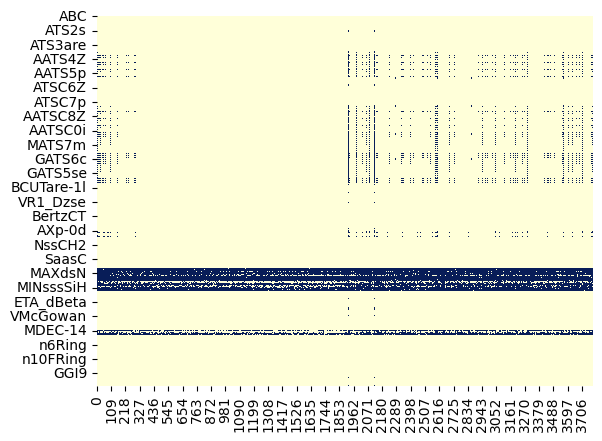

In [31]:
molecules_features_no_low_var[molecules_features_no_low_var.isnull().any(axis=1)]
print(f'There are {molecules_features_no_low_var[molecules_features_no_low_var.isnull().any(axis=1)].shape[0]} rows with at least one NaN value.')
g = sns.heatmap(molecules_features_no_low_var.isna().transpose(), cmap="YlGnBu", cbar=False)

## Dropping all Columns That Are Mainly NaN

We can see from the heatmap that some columns are mostly filled by nan values. These columns are useless to us, and should be deleted. We will drop all columns that are 50% filled by NaN values.

In [32]:
def drop_columns_with_high_nan_count(df: pd.DataFrame, fraction: float):
    threshold = df.shape[0] * fraction
    columns = []
    for column in df.columns:
        if df[column].isna().sum() >= threshold:
            columns.append(column)
    return df.drop(columns, axis=1)

In [33]:
molecules_features_low_nan_columns = drop_columns_with_high_nan_count(df=molecules_features_no_low_var, fraction=0.5)
print(molecules_features_low_nan_columns.shape)
molecules_features_low_nan_columns.head()

(3790, 1337)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.507477,-1.725103,-0.379967,3.268473,-1.561389,-3.020036,-3.050970,-1.561389,-3.827238,-2.988748,...,-3.353755,-1.914014,-1.524983,-0.398244,-0.368447,-1.407156,-1.497087,-1.477366,-1.150239,-1.511183
1,-1.446169,-1.598694,-0.379967,-0.582966,-1.449695,-2.485900,-2.494495,-1.449695,-1.969972,-2.584160,...,-2.737342,-1.756301,-1.433377,-0.134151,-0.366903,-1.327180,-1.438855,-1.418484,-1.095514,-1.385151
2,-1.446169,-1.598694,-0.379967,-0.582966,-1.449695,-2.485900,-2.494495,-1.449695,-1.969972,-2.584160,...,-2.737342,-1.756301,-1.427673,0.130501,-0.366903,-1.327180,-1.438855,-1.418484,-1.095514,-1.385151
3,-1.541137,-1.741263,-0.379967,0.700847,-1.497495,-3.546363,-3.599310,-1.497495,-1.215733,-3.027626,...,-4.001695,-2.008995,-1.421927,-0.274422,-0.368276,-1.367168,-1.526204,-1.489142,-1.284012,-1.416659
4,-1.507477,-1.725103,-0.379967,-0.582966,-1.561389,-3.020036,-3.050970,-1.561389,-3.827238,-2.988748,...,-3.353755,-1.914014,-1.416287,-0.050577,-0.368447,-1.407156,-1.497087,-1.477366,-1.150239,-1.511183


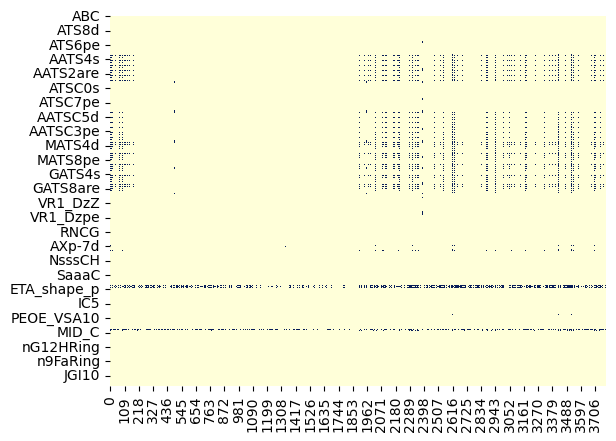

In [34]:
g = sns.heatmap(molecules_features_low_nan_columns.isna().transpose(), cmap="YlGnBu", cbar=False)

## k-Nearest Neighbor (Imputation of NaN values)

KNN imputation is effective for certain situations:

- Good for continuous numerical data with unpredictable missing values.
- Suitable when similar data points share similar values and there's a clear data structure.
- Works well for small to medium-sized datasets with manageable computational cost.
- Captures complex relationships with multiple features.
- Doesn't assume linearity and handles outliers.
  
However, KNN may not be ideal:

- In high-dimensional data due to the "curse of dimensionality."
- With highly sparse data, leading to unreliable imputations.
- For large datasets due to computational intensity.
- For categorical data (better for numerical data).
- In imbalanced datasets favoring majority class imputations.

Before using KNN, explore data and compare with other imputation methods for best performance.

Source: ChatGPT

It's important to note that, even though KNN seems very good for this situation, High Dimensionality is a problem here.

In [35]:
print(f"Number of Nan values: {molecules_features_low_nan_columns.isna().sum().sum()}")

Number of Nan values: 80169


In [36]:
selector = KNNImputer(n_neighbors=5)
molecules_features_fill_na = selector.fit_transform(molecules_features_low_nan_columns)

In [37]:
molecules_features_no_na = pd.DataFrame(molecules_features_fill_na, columns=molecules_features_low_nan_columns.columns)
print(molecules_features_no_na.shape)
molecules_features_no_na.head()

(3790, 1337)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.507477,-1.725103,-0.379967,3.268473,-1.561389,-3.020036,-3.050970,-1.561389,-3.827238,-2.988748,...,-3.353755,-1.914014,-1.524983,-0.398244,-0.368447,-1.407156,-1.497087,-1.477366,-1.150239,-1.511183
1,-1.446169,-1.598694,-0.379967,-0.582966,-1.449695,-2.485900,-2.494495,-1.449695,-1.969972,-2.584160,...,-2.737342,-1.756301,-1.433377,-0.134151,-0.366903,-1.327180,-1.438855,-1.418484,-1.095514,-1.385151
2,-1.446169,-1.598694,-0.379967,-0.582966,-1.449695,-2.485900,-2.494495,-1.449695,-1.969972,-2.584160,...,-2.737342,-1.756301,-1.427673,0.130501,-0.366903,-1.327180,-1.438855,-1.418484,-1.095514,-1.385151
3,-1.541137,-1.741263,-0.379967,0.700847,-1.497495,-3.546363,-3.599310,-1.497495,-1.215733,-3.027626,...,-4.001695,-2.008995,-1.421927,-0.274422,-0.368276,-1.367168,-1.526204,-1.489142,-1.284012,-1.416659
4,-1.507477,-1.725103,-0.379967,-0.582966,-1.561389,-3.020036,-3.050970,-1.561389,-3.827238,-2.988748,...,-3.353755,-1.914014,-1.416287,-0.050577,-0.368447,-1.407156,-1.497087,-1.477366,-1.150239,-1.511183


Number of Nan values: 0


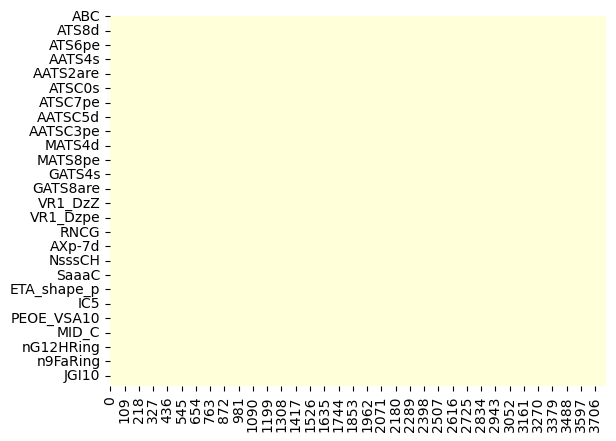

In [38]:
print(f"Number of Nan values: {molecules_features_no_na.isna().sum().sum()}")
g = sns.heatmap(molecules_features_no_na.isna().transpose(), cmap="YlGnBu", cbar=False)

## Descale the Data

Now, we need to restore the data to the way it way before scaling. We do this fo rtwo reasons:

1. Some models need to be calculated on scaled data, some can't be.

2. For the models that need to use scaled data, the scaling process needs to be done separatly for the training and the testing datasets.

For descaling, it's essential to utilize the identical scaler object employed for the initial data scaling. However, the scaler object was originally fitted to the complete dataset, and along the notebook, several columns from that dataset were removed. We'll craft a provisional dataset that retains the original data but only has the selected columns. This new dataset will be scaled using a new scaler object, enabling us to accurately descale the data.


In [39]:
# creating temporary dataset
drugs_scaler = molecules_features[molecules_features_no_na.columns].copy()
drugs_scaler.shape

(3790, 1337)

In [40]:
# fitting the scaler object to the temporary dataset
descaler = StandardScaler()
_ = descaler.fit_transform(drugs_scaler)

In [41]:
# descaling
molecules_features_descaled = descaler.inverse_transform(molecules_features_no_na)
molecules_features_descaled = pd.DataFrame(molecules_features_descaled, columns=molecules_features_no_na.columns)

print(molecules_features_descaled.shape)
molecules_features_descaled.head()

(3790, 1337)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0.0,3.000000e+00,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9.0,0.0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0.0,-5.551115e-17,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18.0,2.0,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0.0,-5.551115e-17,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18.0,2.0,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0.0,1.000000e+00,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10.0,1.0,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0.0,-5.551115e-17,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9.0,0.0,12.0,9.0,3.111111,1.000000


Here we can compare a few columns of the dataset before the feature selection, and after descaling

In [42]:
molecules_features_descaled[["ABC", "SpMax_A", "WPath", "mZagreb2"]]

,ABC,SpMax_A,WPath,mZagreb2
0,2.449490,1.732051,9.0,1.000000
1,3.047207,1.847759,18.0,1.333333
2,3.047207,1.847759,18.0,1.333333
3,2.121320,1.618034,10.0,1.250000
4,2.449490,1.732051,9.0,1.000000
...,...,...,...,...
3785,13.553507,2.300300,760.0,4.652778
3786,9.439677,2.334414,252.0,3.055556
3787,3.047207,1.847759,18.0,1.333333
3788,7.249407,2.267184,116.0,2.361111


In [43]:
molecules_features[["ABC", "SpMax_A", "WPath", "mZagreb2"]]

,ABC,SpMax_A,WPath,mZagreb2
0,2.449490,1.732051,9,1.000000
1,3.047207,1.847759,18,1.333333
2,3.047207,1.847759,18,1.333333
3,2.121320,1.618034,10,1.250000
4,2.449490,1.732051,9,1.000000
...,...,...,...,...
3785,13.553507,2.300300,760,4.652778
3786,9.439677,2.334414,252,3.055556
3787,3.047207,1.847759,18,1.333333
3788,7.249407,2.267184,116,2.361111


## Remove Highly Correlated Features

It is very important to remove feature with high correlation

In [44]:
def remove_high_corr(df, corr_threshold):
  '''DataFrame, float --> DataFrame

  -----------------------------------------------------------------------------

  This fuction recieved a df and a threshold value for correlation. It will than,
  for each pair or features with correlation above the threshold, select only one.
  It will than return the df without those variables.'''

  #Correlation matrix
  corr_matrix = df.corr().abs()

  #Selecting upper triangle from correlation matrix
  corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

  #Selecting variables to be removed
  remove = []

  for col in corr_matrix.columns:
    if any(corr_matrix[col] > corr_threshold):
      remove.append(col)  
  
  print(f'Number of features removed: {len(remove)}')

  return df.drop(remove, axis = 1)

In [45]:
molecules_features_no_high_corr = remove_high_corr(molecules_features_descaled, 0.9)
print(molecules_features_no_high_corr.shape)
molecules_features_no_high_corr.head()

Number of features removed: 732
(3790, 605)


,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VR1_A,VR3_A,nAromAtom,nSpiro,nBridgehead,...,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,SRW05
0,2.449490,0.0,3.000000e+00,1.732051,0.866025,5.583629,0.803548,-8.881784e-16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.047207,0.0,-5.551115e-17,1.847759,1.045250,8.629874,1.462083,-8.881784e-16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0
2,3.047207,0.0,-5.551115e-17,1.847759,1.045250,8.629874,1.462083,-8.881784e-16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0
3,2.121320,0.0,1.000000e+00,1.618034,1.118034,5.891993,0.857304,-8.881784e-16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0
4,2.449490,0.0,-5.551115e-17,1.732051,0.866025,5.583629,0.803548,-8.881784e-16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Re-join Info and Features Datasets

In [46]:
molecules_info = molecules_info.reset_index(drop=True)
molecules_features_descaled = molecules_features_descaled.reset_index(drop=True)

In [47]:
molecules_processed = pd.concat([molecules_info, molecules_features_no_high_corr, Y], axis=1)
print(molecules_processed.shape)
molecules_processed.head()

(3790, 638)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,SRW05,fda_approved
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1.0
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1.0
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1.0
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Save Dataset

In [48]:
molecules_processed.to_csv("../data/pre_processed_tox_mordred_2d.csv", index=False)